In [2]:
import os
print(os.getcwd())

C:\Users\ELCOT


In [29]:
import pandas as pd
import seaborn as sns

In [11]:

interest=pd.read_csv(r"C:\\Users\\ELCOT\\Desktop\\HomeLLc\\interest.csv")
employment=pd.read_csv(r"C:\\Users\\ELCOT\\Desktop\\HomeLLc\\employment.csv")
gdp=pd.read_csv(r"C:\\Users\\ELCOT\\Desktop\\HomeLLc\\gdp.csv")

In [13]:
print(gdp)
print(employment)
print(interest)

           DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
3    1947-10-01    259.745
4    1948-01-01    265.742
..          ...        ...
302  2022-07-01  25994.639
303  2022-10-01  26408.405
304  2023-01-01  26813.601
305  2023-04-01  27063.012
306  2023-07-01  27644.463

[307 rows x 2 columns]
           DATE  LREM25TTUSM156S
0    1977-01-01        71.075314
1    1977-02-01        71.203849
2    1977-03-01        71.354957
3    1977-04-01        71.588804
4    1977-05-01        71.757778
..          ...              ...
557  2023-06-01        80.788477
558  2023-07-01        80.877110
559  2023-08-01        80.804612
560  2023-09-01        80.863396
561  2023-10-01        80.652999

[562 rows x 2 columns]
           DATE  REAINTRATREARAT10Y
0    01-01-1982            7.623742
1    01-02-1982            7.656648
2    01-03-1982            7.128993
3    01-04-1982            7.408347
4    01-05-1982            7.320041
..          ... 

In [20]:
import pandas as pd


gdp_data = pd.read_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\gdp.csv')
employment_data = pd.read_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\employment.csv')
interest_data = pd.read_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\interest.csv')
house_data=pd.read_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\HOUST.csv')
merged_data = pd.merge(gdp_data, employment_data, on='DATE', how='inner')
merged_data = pd.merge(merged_data, interest_data, on='DATE', how='inner')
merged_data = pd.merge(merged_data, house_data, on='DATE', how='inner')
merged_data.to_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\combined_data.csv', index=False)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [22]:
# Data is collected and is viewed
data = pd.read_csv('C:\\Users\\ELCOT\\Desktop\\HomeLLc\\combined_data.csv')
print(data.head())

         DATE       GDP  Emplyment rate  Interest rate  House Units
0  01-01-1982  3274.302       74.080049       7.623742          843
1  01-04-1982  3331.972       73.668871       7.408347          917
2  01-07-1982  3366.322       73.566973       7.558987         1166
3  01-10-1982  3402.561       72.958554       6.279162         1173
4  01-01-1983  3473.413       73.004915       5.543389         1586


In [25]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%m-%d-%Y')
print(data.isnull().sum())

DATE              0
GDP               0
Emplyment rate    0
Interest rate     0
House Units       0
dtype: int64


In [26]:
# Checking if there are some missing values
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

DATE              0
GDP               0
Emplyment rate    0
Interest rate     0
House Units       0
dtype: int64


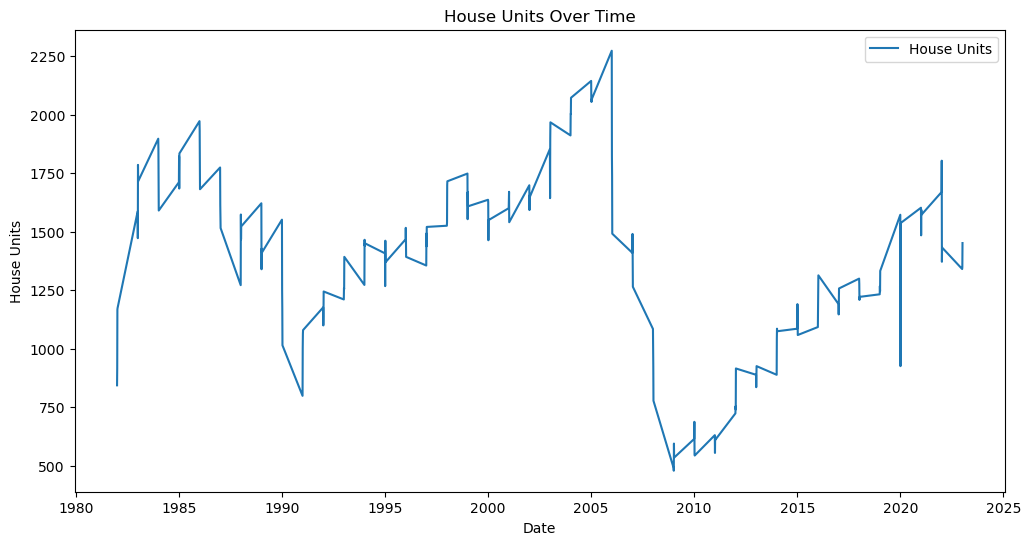

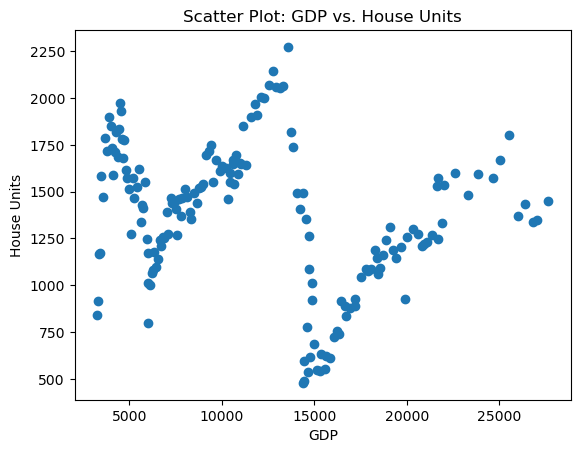

In [27]:
# House units data
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['House Units'], label='House Units')
plt.xlabel('Date')
plt.ylabel('House Units')
plt.title('House Units Over Time')
plt.legend()
plt.show()

plt.scatter(data['GDP'], data['House Units'])
plt.xlabel('GDP')
plt.ylabel('House Units')
plt.title('Scatter Plot: GDP vs. House Units')
plt.show()


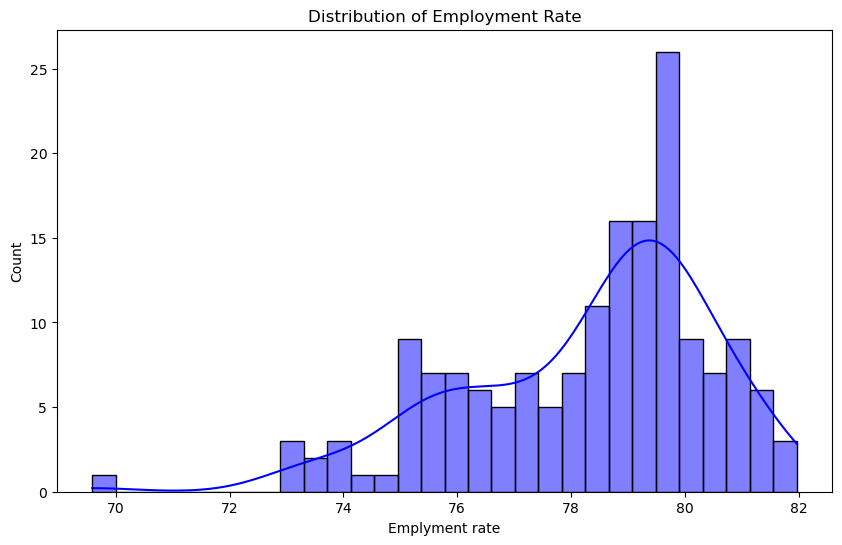

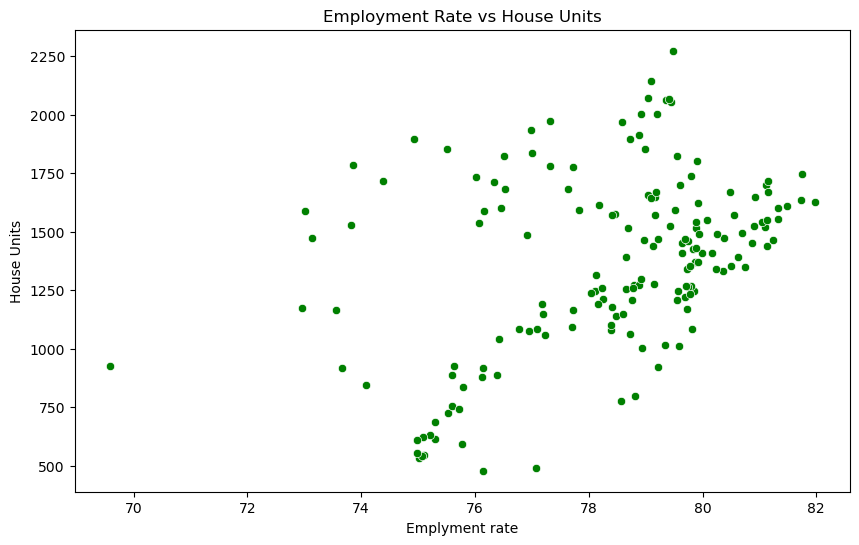

C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


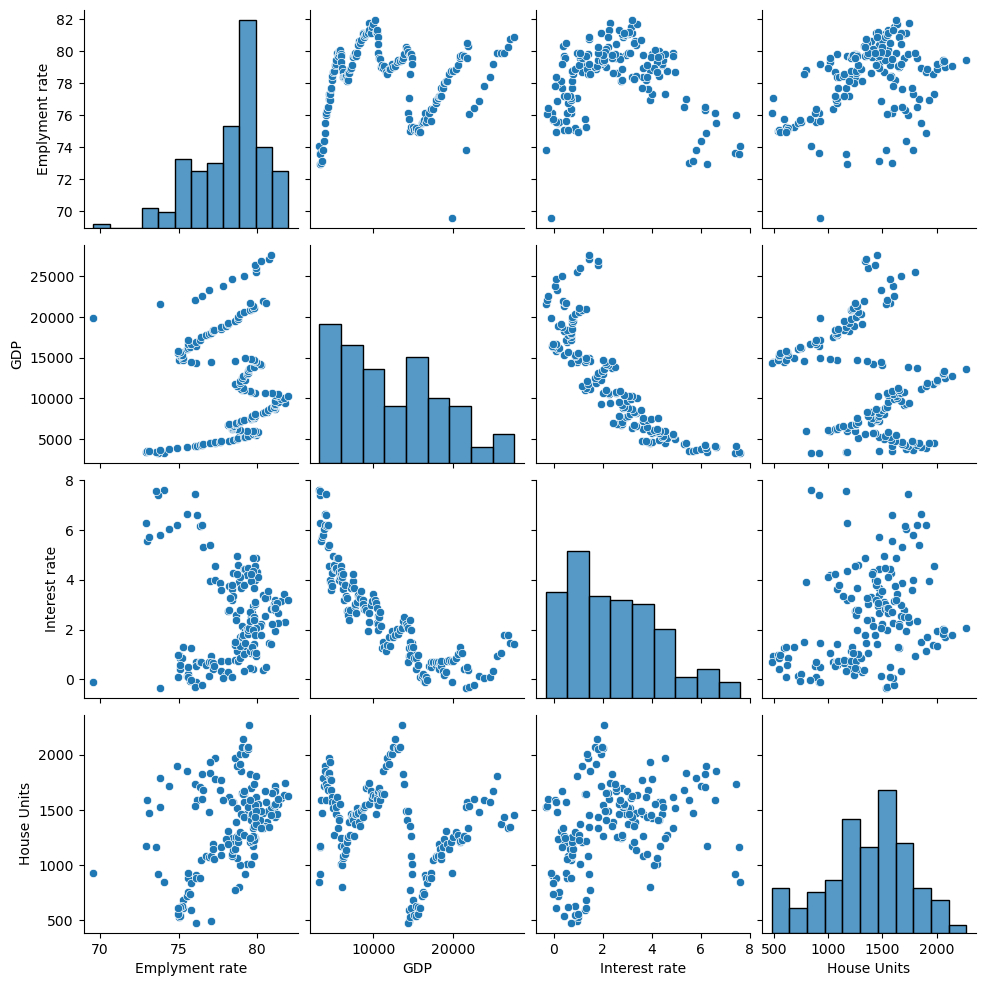

In [30]:
# Employment Rate uni - bi and multivariate
plt.figure(figsize=(10, 6))
sns.histplot(data['Emplyment rate'], kde=True, bins=30, color='blue')
plt.title('Distribution of Employment Rate')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Emplyment rate', y='House Units', data=data, color='green')
plt.title('Employment Rate vs House Units')
plt.show()

sns.pairplot(data[['Emplyment rate', 'GDP', 'Interest rate', 'House Units']])
plt.show()

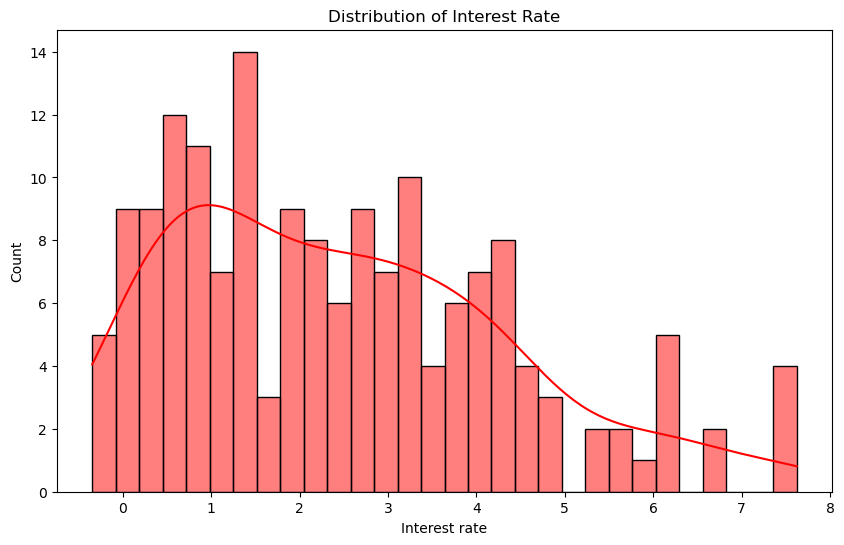

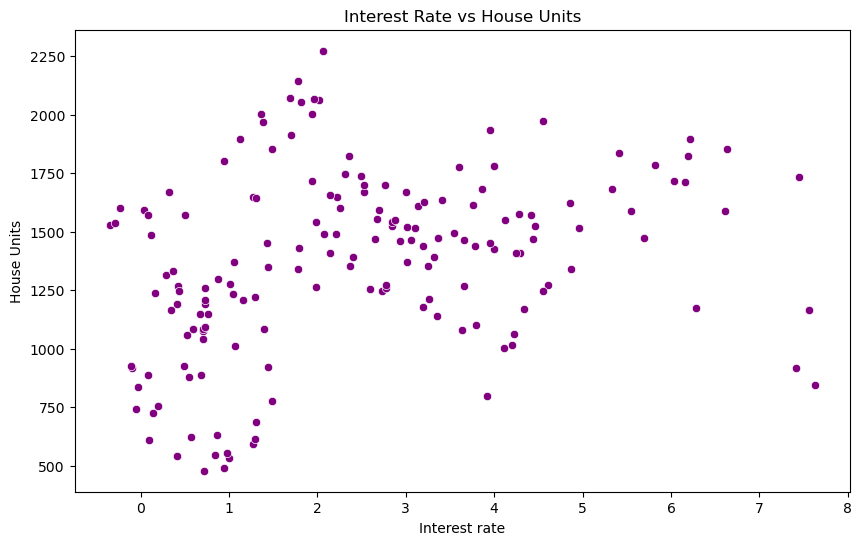

C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


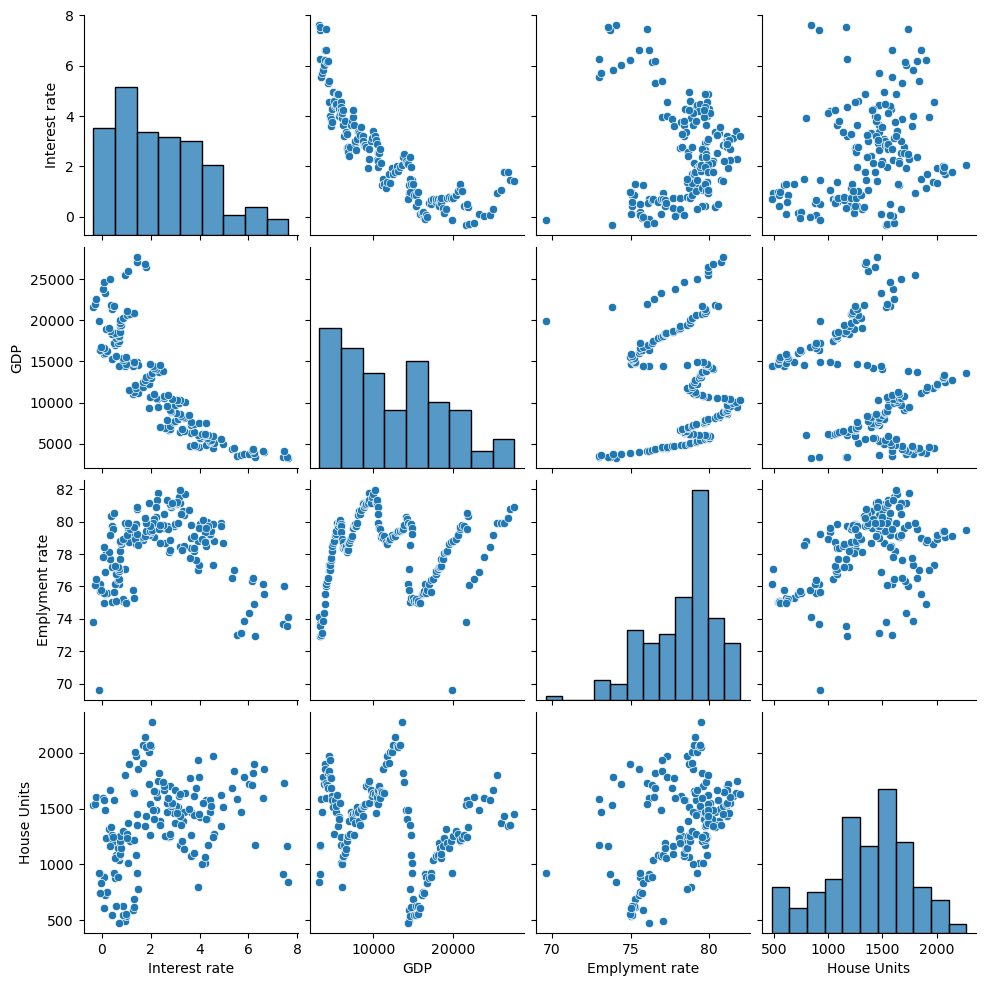

In [31]:
# Interest Rate uni- bi and multi variate analysis

plt.figure(figsize=(10, 6))
sns.histplot(data['Interest rate'], kde=True, bins=30, color='red')
plt.title('Distribution of Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interest rate', y='House Units', data=data, color='purple')
plt.title('Interest Rate vs House Units')
plt.show()

sns.pairplot(data[['Interest rate', 'GDP', 'Emplyment rate', 'House Units']])
plt.show()

In [32]:
# lag creation
data['GDP_Lag1'] = data['GDP'].shift(1)
data['EmploymentRate_Lag1'] = data['Emplyment rate'].shift(1)
data['InterestRate_Lag1'] = data['Interest rate'].shift(1)
data.dropna(inplace=True)

In [33]:
#Testing the model
X = data[['GDP_Lag1', 'EmploymentRate_Lag1', 'InterestRate_Lag1']]
y = data['House Units']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
#Model building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
#Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16892.742388235296
R-squared: 0.8435512981085516


               Feature  Importance
0             GDP_Lag1    0.729888
2    InterestRate_Lag1    0.185422
1  EmploymentRate_Lag1    0.084690


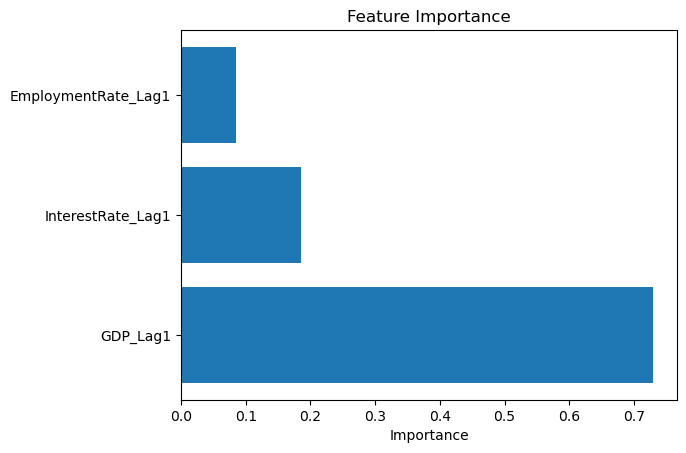

In [37]:
# Final feature
feature_importance = model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
